In [11]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

import pandas as pd
#from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 139.6 MB/s eta 0:00:0000:01


In [13]:
#you can use this to upload the data ffiles(alternatively, use the upload to session button)
#data_csv = files.upload()
#freitexte_csv = files.upload()
!pip install spacy
!python -m spacy download de_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 99.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [14]:
#hier wird das Programm angewiesen, Kommas in Zahlenwerten wie Punkte
#zu lesen, damit der Inhalt richtig verstanden wird
data =pd.read_csv("Data.csv", sep= ";", decimal = ",", encoding ="utf-8")
data.head(5)

,nachforderung,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0.00,2.0,0.00,20.466667,0.000000,327.0,0.0,0,0,1,...,0,0,0.0,0,0,0.0,0.0,0.0,0,0.92
1,19.98,3.0,0.00,78.868797,58.613585,353.0,0.0,0,0,1,...,0,0,0.0,0,0,0.0,0.0,0.0,0,6.77
2,0.00,2.0,0.00,0.000000,0.000000,0.0,0.0,0,0,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0,0.04
3,0.00,2.0,0.00,0.000000,0.000000,0.0,0.0,0,0,1,...,0,0,0.0,0,0,0.0,0.0,0.0,0,1.93
4,0.00,8.0,4.05,248.197640,281.908553,3585.0,0.0,6,0,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0,0.30


<Axes: >

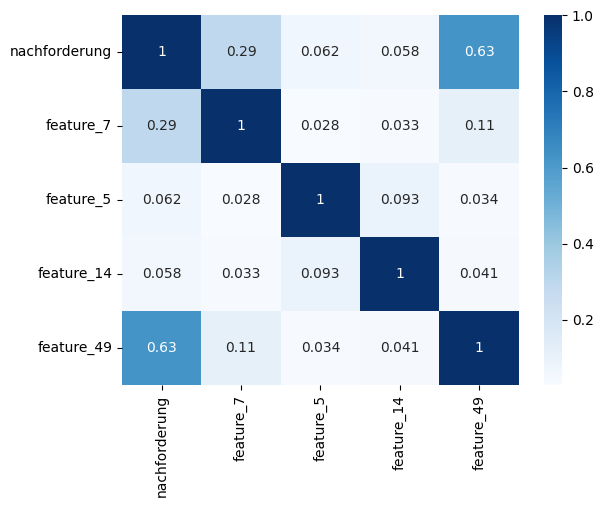

In [15]:
sns.heatmap(data[['nachforderung', 'feature_7', 'feature_5', 'feature_14', 'feature_49']].corr(), cmap='Blues', annot=True)

In [16]:
data.shape

(10000, 51)

In [17]:
data.describe()

,nachforderung,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,424.715052,91.067076,-1.771072,170.830573,116.891288,1244.415159,0.114589,1.188200,0.068500,0.594600,...,0.037800,0.016500,0.016217,0.00990,0.009300,-2.906734,-0.104624,2.413466,0.00380,22.787845
std,5140.835421,2265.362919,242.750198,900.712165,291.536021,3914.342644,0.663316,2.084182,1.070571,0.494242,...,0.190722,0.127395,0.125043,0.09901,0.095992,88.985883,4.530248,27.599322,0.06153,232.865838
min,0.000000,0.000000,-20629.200000,-223.537228,-1528.390000,-1014.940000,-50.846305,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,-5033.620000,-279.458273,0.000000,0.00000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.400000
50%,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.060000
75%,2.000000,27.000000,2.910000,181.620427,127.126256,1715.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.720000
max,311120.640000,180593.700000,2734.000000,63507.098330,8576.390000,296846.000000,2.000000,8.000000,33.000000,5.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,70.016667,1369.470000,1.00000,8891.530000


In [7]:
data.corr()

,nachforderung,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
nachforderung,1.000000,0.001574,-0.005909,0.010223,0.032554,0.038606,0.062403,0.013974,0.290288,-0.048638,...,0.002112,-0.000172,-0.007212,0.006336,-0.006349,0.002374,0.002284,0.019009,0.013478,0.625142
feature_0,0.001574,1.000000,0.069749,0.008486,-0.013366,-0.007995,-0.003696,-0.009311,0.002439,-0.041694,...,-0.006379,-0.003816,-0.003273,-0.002489,-0.003316,0.000716,0.000398,-0.001914,-0.001146,-0.003105
feature_1,-0.005909,0.069749,1.000000,0.007914,-0.006046,-0.003733,-0.017280,0.024746,0.005205,0.011710,...,0.005474,0.001532,-0.009531,0.007726,0.000687,-0.001814,-0.000732,-0.006959,0.008838,-0.000828
feature_2,0.010223,0.008486,0.007914,1.000000,0.302278,0.081932,0.030780,0.040896,0.005006,-0.074900,...,0.011717,-0.004325,0.013694,-0.006039,-0.014228,0.006196,0.004403,0.019221,0.001963,0.008814
feature_3,0.032554,-0.013366,-0.006046,0.302278,1.000000,0.265779,0.055542,0.133503,0.017394,-0.126124,...,0.029805,0.003949,0.066169,-0.007485,-0.029398,0.013098,0.009261,0.059986,0.014684,0.027652
feature_4,0.038606,-0.007995,-0.003733,0.081932,0.265779,1.000000,0.052224,0.134348,0.010117,-0.108456,...,0.007867,0.004867,0.041762,0.003417,-0.018119,0.010376,0.007330,0.047592,0.013730,0.017210
feature_5,0.062403,-0.003696,-0.017280,0.030780,0.055542,0.052224,1.000000,0.057161,0.027956,-0.064168,...,0.000542,0.007211,0.028638,0.016227,-0.007314,-0.022297,-0.022811,0.012989,0.023636,0.033634
feature_6,0.013974,-0.009311,0.024746,0.040896,0.133503,0.134348,0.057161,1.000000,0.032052,-0.165928,...,0.048272,0.006760,0.009842,-0.005637,-0.007250,-0.017413,-0.016918,0.116698,0.008460,-0.002754
feature_7,0.290288,0.002439,0.005205,0.005006,0.017394,0.010117,0.027956,0.032052,1.000000,-0.056949,...,-0.012683,-0.008288,-0.008299,0.017189,-0.006200,0.002090,0.001478,0.052841,0.034004,0.112041
feature_8,-0.048638,-0.041694,0.011710,-0.074900,-0.126124,-0.108456,-0.064168,-0.165928,-0.056949,1.000000,...,0.029963,-0.012880,-0.156038,-0.026293,0.071044,0.024164,0.015763,-0.058096,-0.031554,-0.000080


In [19]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

X = data.iloc[:, 1:51]
Y = data.iloc[:, 0]

best_features= SelectKBest(score_func= f_regression, k=3)

fit= best_features.fit(X,Y)

In [20]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

print(features_scores)

      Features        Score
0    feature_0     0.024778
1    feature_1     0.349158
2    feature_2     1.044921
3    feature_3    10.606795
4    feature_4    14.923631
5    feature_5    39.085148
6    feature_6     1.952713
7    feature_7   920.030065
8    feature_8    23.707698
9    feature_9     0.084750
10  feature_10     0.074811
11  feature_11     3.034725
12  feature_12     0.005638
13  feature_13     8.120117
14  feature_14    33.453355
15  feature_15     2.128192
16  feature_16     5.517666
17  feature_17     3.278401
18  feature_18     0.499905
19  feature_19     7.407963
20  feature_20    22.679059
21  feature_21     0.032865
22  feature_22     7.651356
23  feature_23    15.709677
24  feature_24     0.023841
25  feature_25     1.895063
26  feature_26     6.262213
27  feature_27     0.212197
28  feature_28     7.502539
29  feature_29     4.747839
30  feature_30     0.024314
31  feature_31     2.166001
32  feature_32     0.068546
33  feature_33    23.537670
34  feature_34     0

In [21]:
X= data[['feature_7', 'feature_5', 'feature_14']]
Y= data[['nachforderung']]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=100)

In [22]:
from sklearn.linear_model import LinearRegression

linreg= LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print (y_pred)

[[   91.58080953]
 [   91.58080953]
 [   91.58080953]
 [  484.01099019]
 [   91.58080953]
 [   91.58080953]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [  556.61104524]
 [   91.58080953]
 [   91.58080953]
 [   91.58080953]
 [   91.58080953]
 [  949.0412259 ]
 [  556.61104524]
 [   91.58080953]
 [   91.58080953]
 [   91.58080953]
 [   91.58080953]
 [   91.58080953]
 [  556.61104524]
 [   91.58080953]
 [   91.58080953]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [  556.61104524]
 [  949.0412259 ]
 [  556.61104524]
 [  556.61104524]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [   91.58080953]
 [   91.58080953]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [  556.61104524]
 [  484.01099019]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [  556.61104524]
 [   91.58080953]
 [  556.61104524]
 [  556.61104524]
 [   91.58080953]
 [   91.58080953]
 [  556.61

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))
print(median_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

472.7225996541089
1869981.1028327679
91.58080953298975
0.4901427555933182


In [24]:
import spacy
nlp = spacy.load('de_core_news_sm')

category_keywords={
    "Rentner/Rentnerinnen":["Rentner", "Ruhestand", "Rente"],
    "Überstunden":["ÜS", "Überstd.", "Überstunden", "Ü-std", "Mehrarbeit", "Überstundenvergütung"],
    "Geringfügig beschäftigt":["Midijob", "geringfügig beschäftigter", "geringfügige Beschäftigung",
                   "Midijobber", "Minijob", "geringfügig angestellt"],
    "Übergangsbereich":["Übergangsbereich", "Ü-bereich", "Ue-Bereich"],
    "Einmalzahlungen":["Einmalzahluung", "Einmalzahlung", "einmalige zahlung", "Bonuszahlung", "urlaubsgeld",
                       "Sonderzahlung", "Weihnachtsgeld", "Jahressonderzahlung", "einmalige Zahlung", "13.gehalt",
                       "Urlaubsgeld", "Bonuszahlung", "Sonderzlg.", "einmalige Zahlungen"]
}

freitexte= pd.read_csv("freitexte.csv", sep= ";", decimal = ",", encoding ="utf-8")


In [28]:
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\säöüß]', '', text)  # keep German characters
    return text

In [29]:
from sklearn.preprocessing import LabelEncoder

def assign_category(text):
  #is the order correct here
    text = preprocess(text)
    print(text)
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return category
    return 'Uncategorized'  # fallback if no keyword is found

data2 =data
data2['predicted_category'] =freitexte['Freitext'].apply(assign_category)

le = LabelEncoder()

data2['category_encoded'] = le.fit_transform(data2['predicted_category'])

print(data2['category_encoded'].unique())
print(data2['predicted_category'].unique())

rentner über regelaltersgrenze  trotzdem volle rentenversicherungsbeiträge
arbeitnehmer im übergangsbereich  pauschal versteuert
person im ruhestand aber sv lief weiter wie zuvor
arbeitnehmer war bereits rentner svbeiträge aber wie regulär abgeführt
gehalt lag im übergangsbereich aber als minijob behandelt
übereich wurde nicht richtig abgerechnet
rentner nach regelaltersgrenze aber weiterhin svpflichtig abgerechnet
geringfügig beschäftigter überschritt die 520eurogrenze dauerhaft
13 gehalt ignoriert bei svberechnung
übergangsbereich ignoriert  normaler minijob angesetzt
einmalzahluung nicht korrekt anangemld
rentner wurde wie normaler arbeitnehmer behandelt
rentner wurde wie normaler arbeitnehmer behandelt
status als vollrentner übersehen beitragsgruppe falsch
übergangsbereich nich korrekt berechnet
geringfügige beschäftigung nicht eingehalten  nachforderung notwendig
midijob falsch als geringfügig eingestuft
gehalt lag im übergangsbereich aber als minijob behandelt
beitragspflicht wur

In [30]:
X2 = data.iloc[:, 1:51]
Y2 = data.iloc[:, 0]

best_features2= SelectKBest(score_func= f_regression, k=3)

fit2= best_features2.fit(X2,Y2)
df_scores2= pd.DataFrame(fit2.scores_)
df_columns2= pd.DataFrame(X2.columns)

features_scores2= pd.concat([df_columns2, df_scores2], axis=1)
features_scores2.columns= ['Features', 'Score']
features_scores2.sort_values(by = 'Score')

X2= data2[['feature_7', 'feature_5', 'feature_14', 'category_encoded']]
Y2= data2[['nachforderung']]

X_train2,X_test2,y_train2,y_test2=train_test_split(X2,Y2,test_size=0.1,random_state=100)

linreg2= LinearRegression()
linreg2.fit(X_train2,y_train2)

y_pred2=linreg2.predict(X_test2)

print(mean_absolute_error(y_test2, y_pred2))
print(mean_squared_error(y_test2,y_pred2))
print(median_absolute_error(y_test2,y_pred2))
print(r2_score(y_test2,y_pred2))

474.5316477608831
1876158.1306641772
183.0270660721149
0.4884585661734494
